# Investigating the Maxwell-Boltzmann distribution for different gases and temperatures

In [171]:
import numpy as np

from scipy.constants import pi
import scipy.integrate as integrate

import matplotlib.pyplot as plt
%matplotlib inline

## Definitions
### Definition of functions

In the following the function of the Maxwell-Boltzmann distribution and the function describing the propability that a particle of a gas is moving at some certain speed $v$ in one direction are defined. The functions are as follows:

\begin{equation}
  f(v) = 4 \pi \sqrt{\frac{m}{2 \pi k T}} v^2 e^{-m v^2 / 2 k T} \\
  f(v_{i}) = \sqrt{\frac{m}{2 \pi k T}} \cdot e^{-m v_{i}^2 / 2 k T}
\end{equation}

These expressions can be derived from the kinetic gas model under the assumption that the fraction of molecules with velocity $v$ follows $f(v) = K e^{- E_{Kin} / k T}$. Since $E_{Kin} = \frac{1}{2} m (v_{x}^2 + v_{y}^2 + v_{z}^2)$ one can find out the constant factor $K$ through integration over whole space.

In [200]:
def maxwell_boltzmann_distribution(x, m, k, T):
    return 4 * np.pi * (m / (2 * np.pi * k * T))**0.5 * x**2 * np.exp(- (m * x**2) / (2 * k * T))

In [196]:
def velocity_distribution_direction(x, m, k, T):
    return (m / (2 * np.pi * k * T))**0.5 * np.exp(-m * x**2 / (2 * k * T))

### Definition of constants

In [203]:
M_carbon_dioxide = 44 # mass of carbon dioxide in g/mol
m_carbon_dioxide = M_carbon_dioxide / scipy.constants.Avogadro # mass in kg

M_hydrogen = 2 # mass of hydrogen in g/mol
m_hydrogen = M_hydrogen / scipy.constants.Avogadro # mass in kg

M_boran = 14 # mass of BH3 in g/mol
m_boran = M_boran / scipy.constants.Avogadro # mass in kg

T = 298 # Temperature in K

k = scipy.constants.k # Boltzmann constant

## The velocity distribution in one direction

In [204]:
integral_of_velocity_distribution_carbon_dioxide = integrate.quad(velocity_distribution_direction, -np.inf, np.inf, args=(m_carbon_dioxide, k, T))[0]
integral_of_velocity_distribution_hydrogen = integrate.quad(velocity_distribution_direction, -np.inf, np.inf, args=(m_hydrogen, k, T))[0]
integral_of_velocity_distribution_boran = integrate.quad(velocity_distribution_direction, -np.inf, np.inf, args=(m_boran, k, T))[0]

print("Integral for CO2 = ", round(integral_of_velocity_distribution_carbon_dioxide, 1))
print("Integral for H2 = ", round(integral_of_velocity_distribution_hydrogen, 1))
print("Integral for BH3 = ", round(integral_of_velocity_distribution_boran, 1))

Integral for CO2 =  1.0
Integral for H2 =  1.0
Integral for BH3 =  1.0


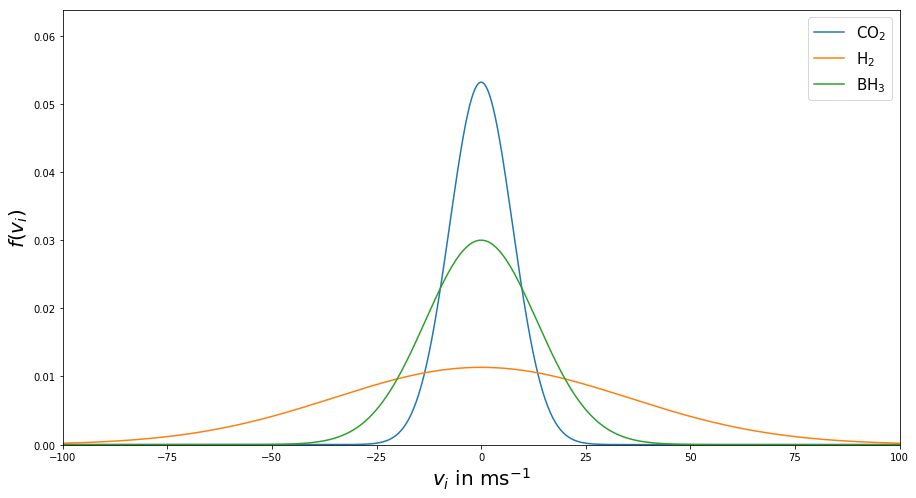

In [215]:
x_min = -100
x_max = 100

y_max = 1.2 * (m_carbon_dioxide / (2 * np.pi * k * T))**0.5 

x_data = np.linspace(x_min, x_max, 1000)
y_data_carbon_dioxide = velocity_distribution_direction(x_data, m_carbon_dioxide, k, T)
y_data_hydrogen = velocity_distribution_direction(x_data, m_hydrogen, k, T)
y_data_boran = velocity_distribution_direction(x_data, m_boran, k, T)

plt.figure(figsize=(15, 8))

plt.plot(x_data, y_data_carbon_dioxide, label="CO$_{2}$")
plt.plot(x_data, y_data_hydrogen, label="H$_{2}$")
plt.plot(x_data, y_data_boran, label="BH$_{3}$")

plt.legend(loc='best', prop={'size': 15})

plt.xlim(xmin = x_min, xmax = x_max)
plt.ylim(ymin = 0, ymax = y_max)

plt.xlabel('$v_{i}$ in ms$^{-1}$', fontsize=20)
plt.ylabel('$f(v_{i})$', fontsize=20)

plt.show()

## Maxwell-Boltzmann distribution

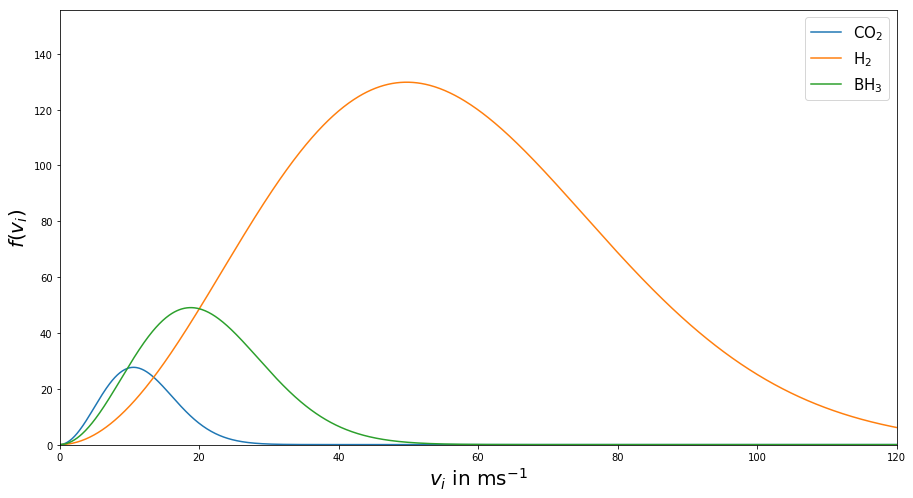

In [227]:
x_min = 0
x_max = 120

x_peak_hydrogen = ((2 * k * T) / m_hydrogen)**0.5

y_max = 1.2 * maxwell_boltzmann_distribution(x_peak_carbon_dioxide, m_hydrogen, k, T) # 1.2 * (m_carbon_dioxide / (2 * np.pi * k * T))**0.5 

x_data = np.linspace(x_min, x_max, 1000)
y_data_carbon_dioxide = maxwell_boltzmann_distribution(x_data, m_carbon_dioxide, k, T)
y_data_hydrogen = maxwell_boltzmann_distribution(x_data, m_hydrogen, k, T)
y_data_boran = maxwell_boltzmann_distribution(x_data, m_boran, k, T)

plt.figure(figsize=(15, 8))

plt.plot(x_data, y_data_carbon_dioxide, label="CO$_{2}$")
plt.plot(x_data, y_data_hydrogen, label="H$_{2}$")
plt.plot(x_data, y_data_boran, label="BH$_{3}$")

# plt.axvline(x = x_peak_carbon_dioxide, linestyle="--")

plt.legend(loc='best', prop={'size': 15})

plt.xlim(xmin = x_min, xmax = x_max)
plt.ylim(ymin = 0, ymax = y_max)

plt.xlabel('$v_{i}$ in ms$^{-1}$', fontsize=20)
plt.ylabel('$f(v_{i})$', fontsize=20)

plt.show()

In [240]:
T_1 = 100
T_2 = 298
T_3 = 600

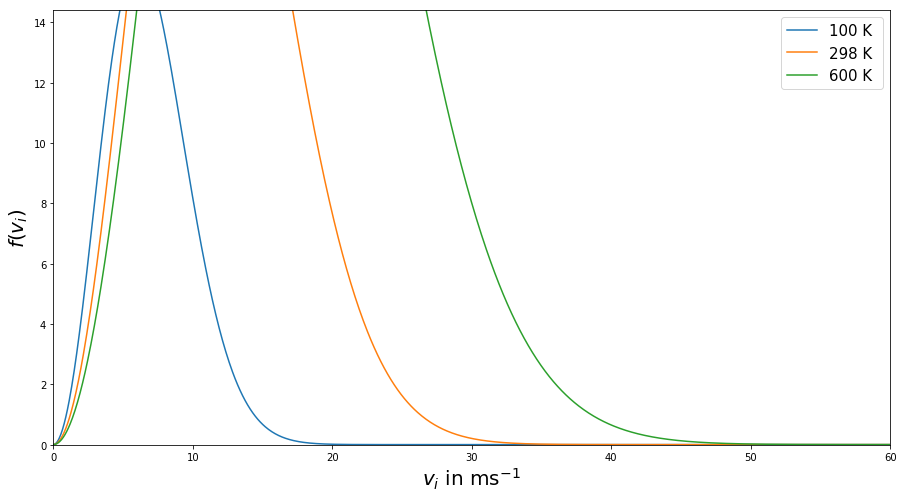

In [243]:
x_min = 0
x_max = 60

x_peak_carbon_dioxide = 1.2 * ((2 * k * T_3) / m_carbon_dioxide)**0.5

y_max = 1.2 * maxwell_boltzmann_distribution(x_peak_carbon_dioxide, m_carbon_dioxide, k, T) # 1.2 * (m_carbon_dioxide / (2 * np.pi * k * T))**0.5 

x_data = np.linspace(x_min, x_max, 1000)
y_data_T1 = maxwell_boltzmann_distribution(x_data, m_carbon_dioxide, k, T_1)
y_data_T2 = maxwell_boltzmann_distribution(x_data, m_carbon_dioxide, k, T_2)
y_data_T3 = maxwell_boltzmann_distribution(x_data, m_carbon_dioxide, k, T_3)

plt.figure(figsize=(15, 8))

plt.plot(x_data, y_data_T1, label="100 K")
plt.plot(x_data, y_data_T2, label="298 K ")
plt.plot(x_data, y_data_T3, label="600 K")

# plt.axvline(x = x_peak_carbon_dioxide, linestyle="--")

plt.legend(loc='best', prop={'size': 15})

plt.xlim(xmin = x_min, xmax = x_max)
plt.ylim(ymin = 0, ymax = y_max)

plt.xlabel('$v_{i}$ in ms$^{-1}$', fontsize=20)
plt.ylabel('$f(v_{i})$', fontsize=20)

plt.show()